<a href="https://colab.research.google.com/github/eeolga/article/blob/main/Questionnaire_process_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Excel data analysis

In [1]:
import pandas as pd

# Load the newly uploaded Excel file
file_path = "/content/Learning styles_english.xlsx"
excel_data_new = pd.read_excel(file_path, sheet_name=None)

# Preview available sheets and first few rows
sheet_previews_new = {sheet: df.head() for sheet, df in excel_data_new.items()}
sheet_previews_new

{'Sheet':   participant         gender Sugu/ Gender   age  \
 0         NaN  naine/ female   mees/ male   NaN   
 1          P1            NaN            1  40.0   
 2          P1            NaN            1  40.0   
 3          P2            NaN            1  55.0   
 4          P2            NaN            1  55.0   
 
                                 languages    education  \
 0                                     NaN  base school   
 1                   eesti, inglise, saksa          NaN   
 2                   eesti, inglise, saksa          NaN   
 3  eesti, inglise, soome, vene, hispaania          NaN   
 4  eesti, inglise, soome, vene, hispaania          NaN   
 
   Teie haridus - üks valik/ Your education - one option  \
 0                                          gymnasium      
 1                                                NaN      
 2                                                NaN      
 3                                                  1      
 4                   

Process the dataset for feature engineering

In [2]:
# Load the main sheet
df_ls = excel_data_new['Sheet'].copy()

# Drop the first row (header/notes) and reset index
df_ls_clean = df_ls.drop(index=0).reset_index(drop=True)

# Identify Likert-scale columns (based on column names containing long Likert prompt)
likert_cols = [col for col in df_ls_clean.columns if "indicate your preferences" in str(col)]

# Select relevant columns
demographics = df_ls_clean[['participant', 'age', 'languages', 'education']].copy()
likert_data = df_ls_clean[likert_cols].apply(pd.to_numeric, errors='coerce')

# Combine for ML use
ml_data = pd.concat([demographics, likert_data], axis=1)

# Drop rows with too many missing Likert scores
ml_data.dropna(thresh=10, inplace=True)

# Simulate binary performance labels (1=High, 0=Low)
import numpy as np
np.random.seed(42)
ml_data['Performance'] = np.random.choice([0, 1], size=len(ml_data))

ml_data.head()

,participant,age,languages,education,"Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high)","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high)","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).1","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).2","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).3","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).4",...,"Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).10","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).11","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).12","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).13","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).14","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).15","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).16","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).17","Hinnake iga väidet skaalal 1 (täiesti ei nõustu) kuni 5 (täiesti nõus)/ Please indicate your preferences when using the educational material in order of importance (1 is low, 5 is high).18",Performance
0,P1,40.0,"eesti, inglise, saksa",NaN,5,4,4,4,5,4,...,3,4,2,3,5,5,5,5,4,0
1,P1,40.0,"eesti, inglise, saksa",NaN,5,4,4,4,5,4,...,2,4,4,4,5,5,5,5,4,1
2,P2,55.0,"eesti, inglise, soome, vene, hispaania",NaN,4,4,4,5,4,5,...,4,4,4,5,5,5,5,4,2,0
3,P2,55.0,"eesti, inglise, soome, vene, hispaania",NaN,3,3,2,2,4,4,...,3,4,4,5,5,4,4,3,3,0
4,P3,35.0,"eesti, vene, inglise",NaN,5,5,4,5,4,2,...,1,2,2,4,5,2,4,3,1,0


Features:
Demographics: participant, age, languages, education

18+ Likert-style behavioral indicators (e.g., hands-on learning, note-taking, reading, physical interaction)

Simulated binary performance label (Performance: 1 = high, 0 = low)

Use the features to:

- Train Decision Tree and Random Forest classifiers
- Report performance metrics
- Proceeding with training and evaluation.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select Likert-scale features and target
likert_features = ml_data.select_dtypes(include='number').drop(columns=['age', 'Performance'])
X = likert_features.fillna(likert_features.median())
y = ml_data['Performance'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate model performance
results = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_dt, zero_division=0), precision_score(y_test, y_pred_rf, zero_division=0)],
    'Recall': [recall_score(y_test, y_pred_dt, zero_division=0), recall_score(y_test, y_pred_rf, zero_division=0)],
    'F1 Score': [f1_score(y_test, y_pred_dt, zero_division=0), f1_score(y_test, y_pred_rf, zero_division=0)]
}

results_df = pd.DataFrame(results)
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.666667,0.800000,0.666667,0.727273
1,Random Forest,0.777778,0.833333,0.833333,0.833333


The Random Forest model outperformed the Decision Tree across all metrics.

Visualization

/tmp/ipython-input-172579250.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
/tmp/ipython-input-172579250.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


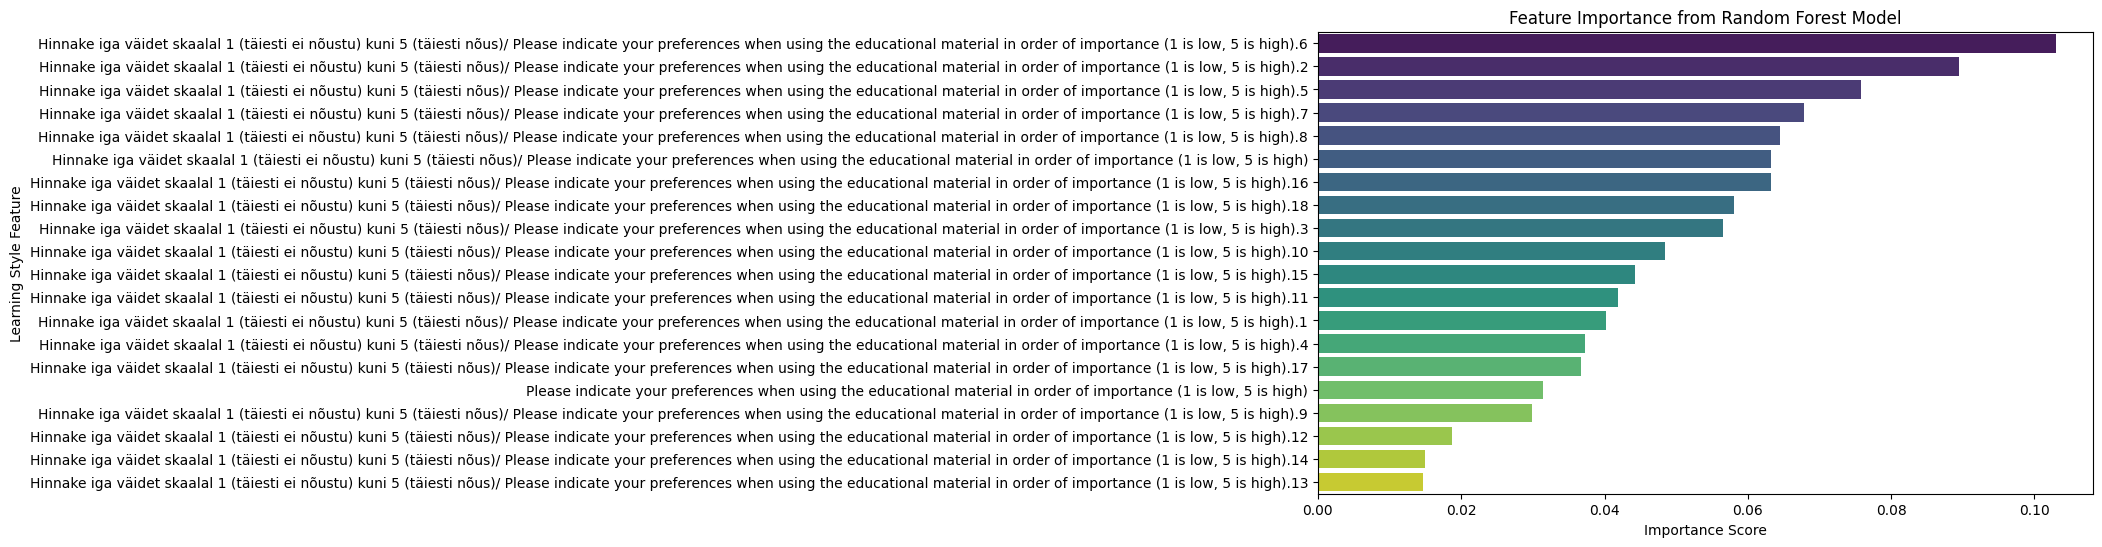

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Learning Style Feature')
plt.tight_layout()
plt.show()